# COVID 19 Analysis


I stole some of this from Brice R -- who did a nice job confirming exponential growth of virus confirmed cases.  See (https://ro-z.net/assets/covid19quickanalysis.html)

I am throwing in analysis of my local target US states + the hot countries Spain, Italy, etc to compare and contrast.

Datasets are all available on github courtesy of John Hopkins, just download via:

-  git clone https://github.com/CSSEGISandData/COVID-19.git


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drdir = 'COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'
tsdir = 'COVID-19/csse_covid_19_data/csse_covid_19_time_series/'

daily_f = drdir+'01-22-2020.csv' # 03-18-2020.csv etc
confirmed_f = tsdir+'time_series_19-covid-Confirmed.csv'
deaths_f = tsdir+'time_series_19-covid-Deaths.csv'

dfc = pd.read_csv(confirmed_f)
confirmed = dfc.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
confirmed.index = pd.to_datetime(confirmed.index)

dfd = pd.read_csv(deaths_f)
deaths = dfd.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
deaths.index = pd.to_datetime(deaths.index)


In [4]:
dfc.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790


In [5]:
confirmed = dfc.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
confirmed.index = pd.to_datetime(confirmed.index)

dfd = pd.read_csv(deaths_f)
deaths = dfd.drop(columns=['Lat','Long']).groupby( ['Country/Region']).sum().transpose()
deaths.index = pd.to_datetime(deaths.index)


In [18]:
countries = [ 'Japan', 'US', 'Italy', 'Spain','France', 'Korea, South' ]
deaths[ countries ].tail()


Country/Region,Japan,US,Italy,Spain,France,"Korea, South"
2020-03-14,22,54,1441,195,91,72
2020-03-15,22,63,1809,289,91,75
2020-03-16,27,85,2158,342,148,75
2020-03-17,29,108,2503,533,148,81
2020-03-18,29,118,2978,623,148,84


## Views by Country

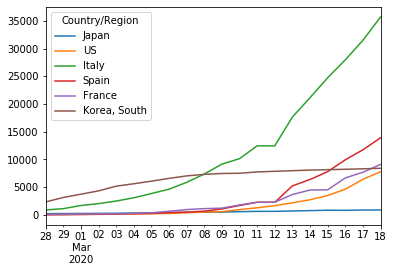

In [19]:
confirmed[ countries ].tail(20).plot()


## US Specific Analysis

One problem is lack of consistent City/State/County info -- some data is by State, most by County.

In [51]:
confirmed_us = dfc[ dfc['Country/Region'] == 'US']
confirmed_us

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,0,267,366,442,568,572,643,904,1076,1014
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,173,220,328,421,525,732,967,1706,2495
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,144,177,221,282,340,426,557,698,751
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,0,92,95,108,123,138,164,197,218,218
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,45,46,46,46,46,46,46,47,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,"New Castle, DE",US,39.5393,-75.6674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
414,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,...,0,0,0,0,5,6,12,29,39,46
417,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,...,0,0,0,0,0,3,5,5,5,5
431,Guam,US,13.4443,144.7937,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,3,5


In [55]:
confirmed_us = dfc[ dfc['Country/Region'] == 'US']
states = [x for x in list(confirmed_us['Province/State']) if 'NC' in x or 'North Carolina' in x]
states


['North Carolina', 'Camden, NC', 'Chatham County, NC', 'Wake County, NC']

In [24]:
# merge to NC
nc1 = confirmed_us[confirmed_us['Province/State'].isin( states )].drop(columns=['Lat', 'Long'])
nc1[ 'Province/State' ] = 'North Carolina'
nc = nc1.groupby( 'Province/State' ).sum().transpose()
nc.tail()

Province/State,North Carolina
3/14/20,24
3/15/20,33
3/16/20,38
3/17/20,64
3/18/20,70


In [57]:
def findState(df, statefull, stateshort):
    states = [x for x in list(df['Province/State']) if stateshort in x or statefull == x]
    return states

def extractState(df, statefull, stateshort):
    states = FindState(df,statefull,stateshort)
    pre = df[ df[ 'Province/State'].isin(states)].drop(columns=['Lat','Long'])
    pre['Province/State'] = statefull
    return pre.groupby('Province/State').sum().transpose()

In [66]:
# mix of countys and state
for state,code in [('New York','NY'), ('New Jersey','NJ'), ('North Carolina','NC'), ('California','CA'), ('Texas','TX'), ('Delaware','DE')]:
    display(findState(confirmed_us, state, code))


['New York',
 'Suffolk County, NY',
 'Ulster County, NY',
 'Rockland County, NY',
 'Saratoga County, NY',
 'Nassau County, NY',
 'New York County, NY',
 'Westchester County, NY']

['New Jersey',
 'Monmouth, NJ',
 'Burlington, NJ',
 'Camden, NJ',
 'Passaic, NJ',
 'Union, NJ',
 'Hudson County, NJ',
 'Bergen County, NJ',
 'Middlesex, NJ']

['North Carolina', 'Camden, NC', 'Chatham County, NC', 'Wake County, NC']

['California',
 'Solano, CA',
 'Santa Cruz, CA',
 'Napa, CA',
 'Ventura, CA',
 'Shasta County, CA',
 'Fresno County, CA',
 'Riverside County, CA',
 'Alameda County, CA',
 'Madera County, CA',
 'Yolo County, CA',
 'Santa Clara County, CA',
 'San Francisco County, CA',
 'Contra Costa County, CA',
 'Orange County, CA',
 'Placer County, CA',
 'San Mateo, CA',
 'Sonoma County, CA',
 'Humboldt County, CA',
 'Sacramento County, CA',
 'San Diego County, CA',
 'San Benito, CA',
 'Los Angeles, CA',
 'Marin, CA',
 'Calaveras, CA',
 'Stanislaus, CA',
 'San Joaquin, CA']

['Texas',
 'Gregg, TX',
 'Collin County, TX',
 'Fort Bend County, TX',
 'Harris County, TX',
 'Dallas, TX',
 'Tarrant, TX',
 'Montgomery, TX']

['Delaware', 'New Castle, DE']

In [68]:
confirmed_st = extractState(confirmed_us, 'Texas', 'TX')
confirmed_st['New York'] = ExtractState(confirmed_us, 'New York', 'NY')
confirmed_st['California'] = ExtractState(confirmed_us, 'California', 'CA')
confirmed_st['North Carolina'] = ExtractState(confirmed_us, 'North Carolina', 'NC')
confirmed_st['New Jersey'] = ExtractState(confirmed_us, 'New Jersey', 'NJ')

confirmed_st['Japan'] = confirmed['Japan']
confirmed_st['Spain'] = confirmed['Spain']
confirmed_st['Italy'] = confirmed['Italy']
confirmed_st['France'] = confirmed['France']
confirmed_st['Korea, South'] = confirmed['Korea, South']
confirmed_st['US'] = confirmed['US']

confirmed_st.tail()

Province/State,Texas,New York,California,North Carolina,New Jersey,Japan,Spain,Italy,France,"Korea, South",US
3/14/20,57,525,340,24,69,773,6391,21157,4487,8086,2727
3/15/20,72,732,426,33,98,839,7798,24747,4523,8162,3499
3/16/20,85,967,557,38,178,825,9942,27980,6668,8236,4632
3/17/20,110,1706,698,64,267,878,11748,31506,7699,8320,6421
3/18/20,173,2495,751,70,267,889,13910,35713,9105,8413,7783


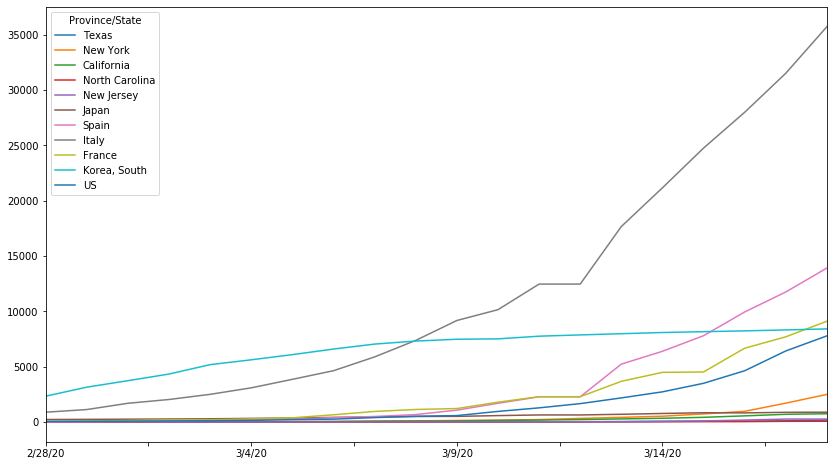

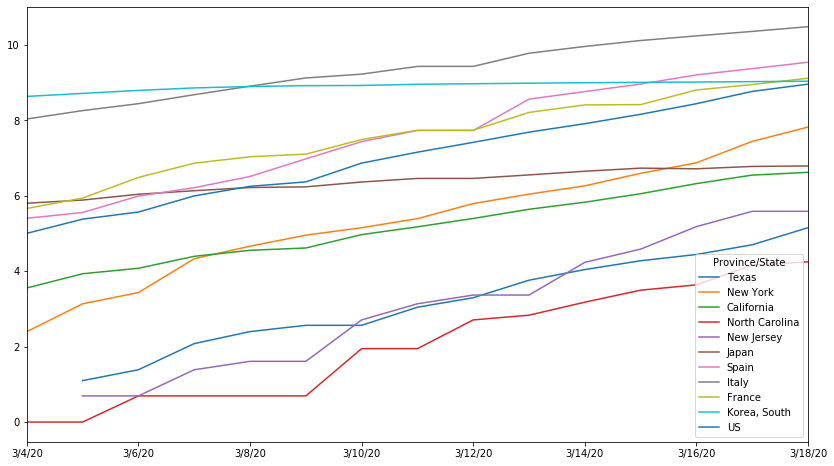

In [80]:
confirmed_st.tail(20).plot(figsize=(14,8))
confirmed_st.apply(np.log).tail(15).plot(figsize=(14,8))

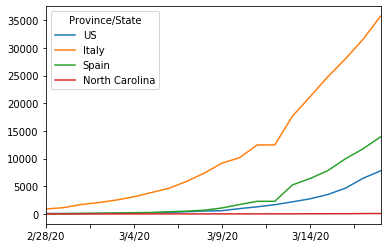

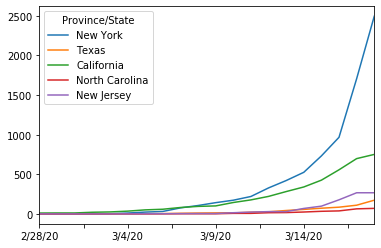

In [79]:
confirmed_st[['US','Italy','Spain','North Carolina']].tail(20).plot()
confirmed_st[['New York','Texas','California','North Carolina','New Jersey']].tail(20).plot()

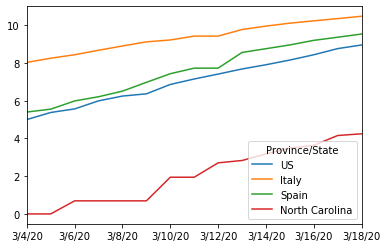

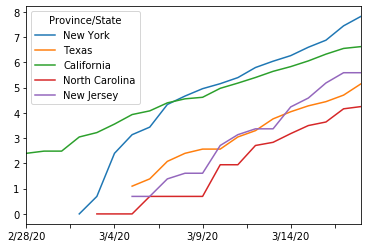

In [78]:
confirmed_st[['US','Italy','Spain','North Carolina']].apply(np.log).tail(15).plot()
confirmed_st[['New York','Texas','California','North Carolina','New Jersey']].apply(np.log).tail(20).plot()


## Maps Geo

get the packages
- geopandas
- shapely
- descartes

Download maps: 
- arcgis - https://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5



In [149]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

usa = gpd.read_file('maps/states.shp')

display(confirmed_us.shape)
confirmed_us2 = confirmed_us
confirmed_us2 = confirmed_us2[confirmed_us2['Long'] > -130]  # exclude hawaii
confirmed_us2 = confirmed_us2[confirmed_us2['Long'] < -75]   # up to new york
confirmed_us2 = confirmed_us2[confirmed_us2['Lat'] < 50]  # below canada
confirmed_us2 = confirmed_us2[confirmed_us2['Lat'] > 22]  # above texas
display(confirmed_us2.shape)

geometry = [Point(xy) for xy in zip(confirmed_us2["Long"],confirmed_us2["Lat"]) ] 
geo_df = gpd.GeoDataFrame(confirmed_us2,crs={"init": "epsg:4326"},geometry=geometry)
geo_df = geo_df[['Province/State','3/12/20','geometry']]

display(usa[0:3])
display(geo_df[0:3])



(247, 62)

(206, 62)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."


,Province/State,3/12/20,geometry
98,Washington,442,POINT (-121.49050 47.40090)
100,California,221,POINT (-119.68160 36.11620)
103,Grand Princess,21,POINT (-122.66550 37.64890)


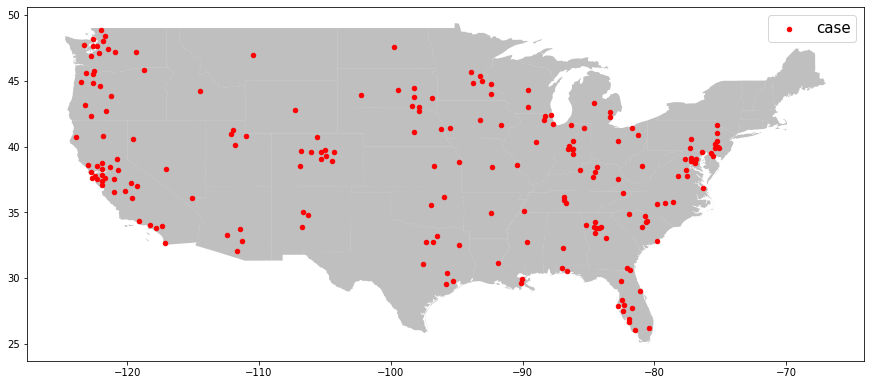

In [150]:

fig, ax = plt.subplots(figsize=(15,15))

cusa = usa[~usa['STATE_NAME'].isin(['Hawaii','Alaska'])]
cusa.plot(ax=ax, alpha=0.5, color='grey')

geo_df.plot(ax=ax, markersize=20, color='red', label='case')
plt.legend(prop={'size': 15})